### Bubble Plot

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

In [1]:
%%capture
!pip3 install xlrd

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_can = pd.read_excel(
    'data/canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

In [4]:
df_can.columns = list(map(lambda x: str(x), df_can.columns))

In [5]:
drops = [
    'AREA', 
    'REG', 
    'DEV', 
    'Type', 
    'Coverage'
]
df_can.drop(columns=drops, inplace=True)

In [6]:
columns = {
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region'
}

df_can.rename(columns=columns, inplace=True)

In [7]:
df_can.set_index('Country', inplace=True)

In [8]:
df_can['Total'] = df_can.sum(axis=1)

In [9]:
years = list(map(str, range(1980, 2014)))

In [10]:
df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)

df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

In [11]:
def normalize(data, col):
    return (data[col] - data[col].min()) / (data[col].max() - data[col].min())

In [12]:
norm_brazil = normalize(df_can_t, 'Brazil')
norm_argentina = normalize(df_can_t, 'Argentina')

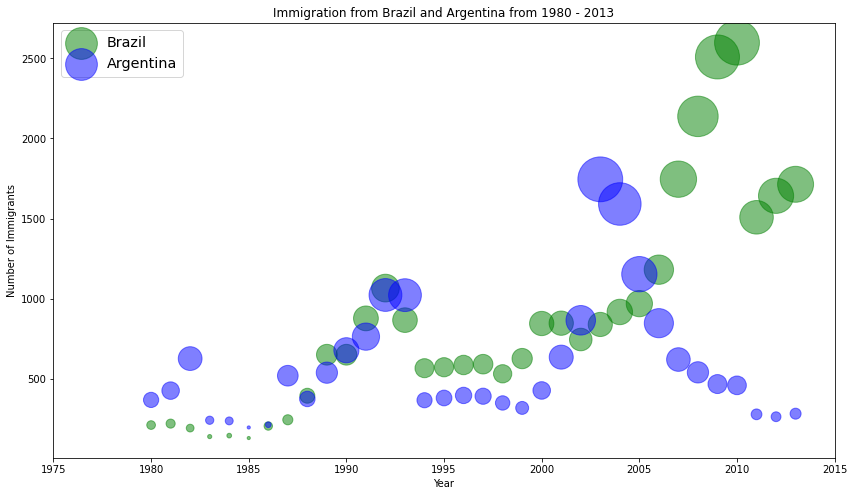

In [13]:
ax0 = df_can_t.plot(
    kind='scatter',
    x='Year',
    y='Brazil',
    figsize=(14, 8),
    alpha=0.5,
    color='green',
    s=norm_brazil * 2000 + 10,
    xlim=(1975, 2015)
)

ax1 = df_can_t.plot(
    kind='scatter',
    x='Year',
    y='Argentina',
    alpha=0.5,
    color='blue',
    s=norm_argentina * 2000 + 10,
    ax = ax0
)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression. 

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.